#Task1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data.csv')

# Drop irrelevant columns (id and any trailing empty column)
df = df.drop(columns=['id'])
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

# Encode Diagnosis: M=1, B=0 [cite: 5, 62]
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target [cite: 4, 30]
X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values

# Feature Scaling (Standardization) - Essential for KNN distance metrics
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_scaled = (X - mean) / std

# Split data: 80% Training, 20% Testing [cite: 3, 29]
np.random.seed(42) # For reproducibility
indices = np.random.permutation(len(X_scaled))
train_size = int(0.8 * len(X_scaled))

train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [ ]:
class KNNFromScratch:
    def __init__(self, k=3, metric='euclidean', p=3):
        self.k = k
        self.metric = metric
        self.p = p # For Minkowski distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def compute_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2)**2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.metric == 'minkowski':
            return np.sum(np.abs(x1 - x2)**self.p)**(1/self.p)
        elif self.metric == 'cosine':
            dot_product = np.dot(x1, x2)
            norm_a = np.linalg.norm(x1)
            norm_b = np.linalg.norm(x2)
            return 1 - (dot_product / (norm_a * norm_b))
        elif self.metric == 'hamming':
            # Hamming on continuous data: count of unequal features
            return np.sum(x1 != x2)
        else:
            raise ValueError("Unsupported metric")

    def predict(self, X):
        predictions = [self._predict_single(x) for x in X]
        return np.array(predictions)

    def _predict_single(self, x):
        # Calculate distances to all training points
        distances = [self.compute_distance(x, x_train) for x_train in self.X_train]
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Major vote
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return max(set(k_nearest_labels), key=k_nearest_labels.count)

def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
k_values = [3, 4, 9, 20, 47]
metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine', 'hamming']
results = {metric: [] for metric in metrics}

best_accuracy = 0
best_config = None

for metric in metrics:
    for k in k_values:
        knn = KNNFromScratch(k=k, metric=metric)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        acc = calculate_accuracy(y_test, preds)
        results[metric].append(acc)

        if acc > best_accuracy:
            best_accuracy = acc
            best_config = (k, metric)

print(f"Best Configuration: K={best_config[0]}, Metric={best_config[1]} with Accuracy={best_accuracy:.4f}")

Best Configuration: K=3, Metric=cosine with Accuracy=0.9649


In [ ]:
# Re-run best model
best_k, best_metric = best_config
knn_best = KNNFromScratch(k=best_k, metric=best_metric)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

def get_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    confusion_matrix = np.array([[tn, fp], [fn, tp]])
    return precision, recall, f1, confusion_matrix

precision, recall, f1, cm = get_metrics(y_test, y_pred_best)

print("\n--- Best Model Results ---")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


--- Best Model Results ---
Precision: 0.9778
Recall: 0.9362
F1-Score: 0.9565
Confusion Matrix:
[[66  1]
 [ 3 44]]


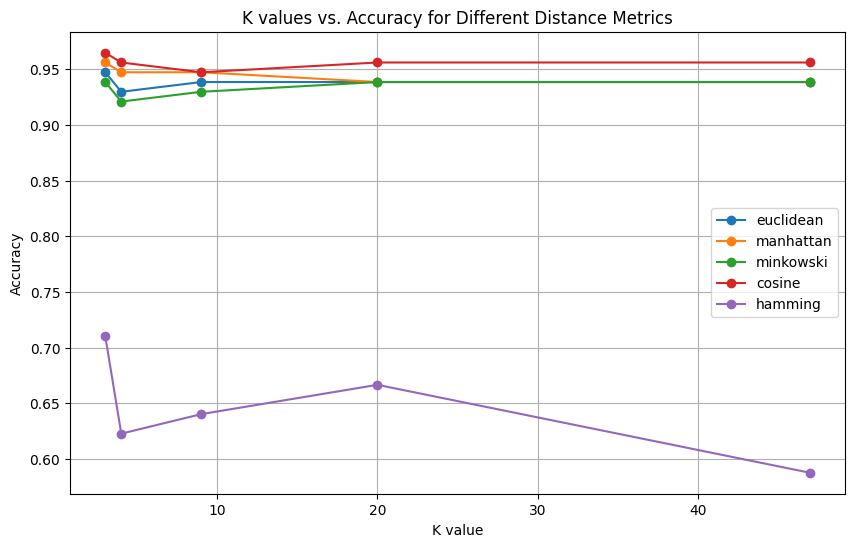

In [ ]:
plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(k_values, results[metric], marker='o', label=metric)

plt.title('K values vs. Accuracy for Different Distance Metrics')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Task 2

In [ ]:
import tarfile

# Extracting the file
file_name = "cifar-10-python.tar.gz"
if file_name.endswith("tar.gz"):
    with tarfile.open(file_name, "r:gz") as tar:
        tar.extractall()
        print("Extraction complete.")

/tmp/ipython-input-1485855597.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


Extraction complete.


Loading data...
Running experiments...
Generating plot...


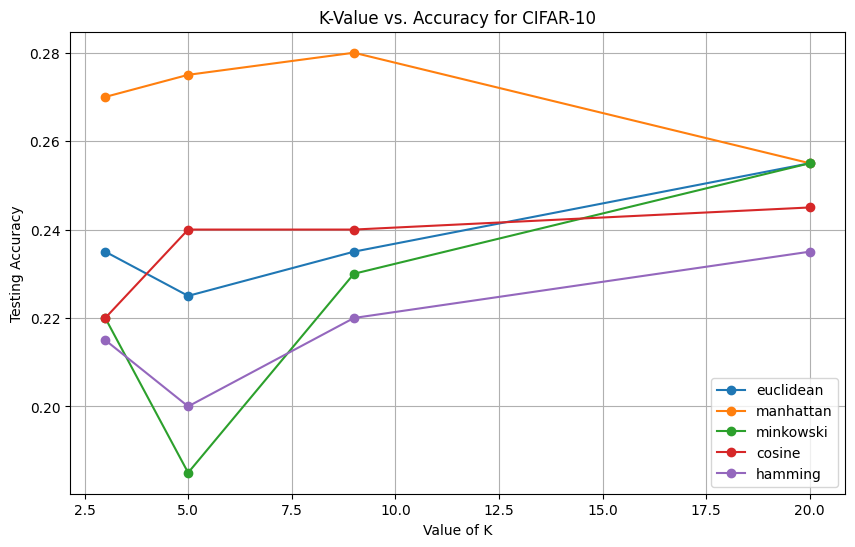


--- Best Configuration Found ---
Metric: manhattan, K: 9

--- Performance Metrics ---
Average Precision: 0.2639
Average Recall: 0.2512

Confusion Matrix (Rows=Actual, Columns=Predicted):
[[10  0  2  0  2  0  1  0  5  0]
 [ 1  2  2  1  3  0  3  0  2  0]
 [ 4  0 10  3  3  1  0  0  0  0]
 [ 2  0  5  2  3  0  6  0  0  1]
 [ 6  0  4  0  3  0  0  0  1  1]
 [ 1  0  6  1  5  0  3  0  2  0]
 [ 2  0  6  0 11  0  6  0  1  0]
 [ 4  1  2  0  4  3  2  0  1  1]
 [ 5  1  0  1  1  0  0  0 20  0]
 [ 6  0  2  0  4  0  0  0  6  3]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# 1. DATA LOADING AND PREPROCESSING
def load_cifar10_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'data'], np.array(dict[b'labels'])

def load_data(data_dir):
    # CIFAR-10 consists of 5 batches for training and 1 for testing
    train_x, train_y = [], []
    for i in range(1, 6):
        batch_x, batch_y = load_cifar10_batch(os.path.join(data_dir, f'data_batch_{i}'))
        train_x.append(batch_x)
        train_y.append(batch_y)

    X_train = np.concatenate(train_x)
    y_train = np.concatenate(train_y)

    X_test, y_test = load_cifar10_batch(os.path.join(data_dir, 'test_batch'))

    # Preprocessing: Flatten (3072 features) and Normalize (0-1 range)
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    return X_train, y_train, X_test, y_test

# 2. KNN CLASSIFIER FROM SCRATCH
class KNNClassifier:
    def __init__(self, k=3, metric='euclidean', p=3):
        self.k = k
        self.metric = metric
        self.p = p

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def compute_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2)**2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.metric == 'minkowski':
            return np.sum(np.abs(x1 - x2)**self.p)**(1/self.p)
        elif self.metric == 'cosine':
            # Cosine Distance = 1 - Cosine Similarity
            dot_product = np.dot(x1, x2)
            norm_a = np.linalg.norm(x1)
            norm_b = np.linalg.norm(x2)
            return 1 - (dot_product / (norm_a * norm_b + 1e-8))
        elif self.metric == 'hamming':
            # Percentage of features that are different
            return np.mean(x1 != x2)
        return 0

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            # Calculate distances to all training points
            # Note: For full CIFAR-10, this loop is computationally intensive
            distances = [self.compute_distance(x, x_t) for x_t in self.X_train]

            # Get the labels of the K nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]

            # Majority vote
            counts = np.bincount(k_nearest_labels)
            predictions.append(np.argmax(counts))
        return np.array(predictions)

# 3. EVALUATION METRICS FROM SCRATCH
def calculate_metrics(y_true, y_pred, num_classes=10):
    # Confusion Matrix [Actual][Predicted]
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t, p] += 1

    precision_list = []
    recall_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    return cm, np.mean(precision_list), np.mean(recall_list)

# 4. EXPERIMENTATION LOOP
# (Note: Using a subset for demonstration as full CIFAR-10 KNN takes hours)
def run_experiment(X_train, y_train, X_test, y_test):
    k_values = [3, 5, 9, 20]
    metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine', 'hamming']

    results = {m: [] for m in metrics}
    best_acc = 0
    best_config = {}

    for m in metrics:
        for k in k_values:
            knn = KNNClassifier(k=k, metric=m)
            knn.fit(X_train, y_train)
            preds = knn.predict(X_test)

            accuracy = np.mean(preds == y_test)
            results[m].append(accuracy)

            if accuracy > best_acc:
                best_acc = accuracy
                best_config = {'k': k, 'metric': m, 'preds': preds}

    return results, best_config, k_values

# 5. VISUALIZATION
def plot_results(results, k_values):
    plt.figure(figsize=(10, 6))
    for metric, accuracies in results.items():
        plt.plot(k_values, accuracies, label=metric, marker='o')

    plt.title('K-Value vs. Accuracy for CIFAR-10')
    plt.xlabel('Value of K')
    plt.ylabel('Testing Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

data_dir = './cifar-10-batches-py'

# 2. Load and preprocess the data
print("Loading data...")
X_train, y_train, X_test, y_test = load_data(data_dir)

# 3. Run the experiment
print("Running experiments...")
train_subset = 2000
test_subset = 200
results, best_config, k_values = run_experiment(
    X_train[:train_subset],
    y_train[:train_subset],
    X_test[:test_subset],
    y_test[:test_subset]
)

# 4. Generate the required plot
print("Generating plot...")
plot_results(results, k_values)

# 5. PRINT DETAILED METRICS FOR THE BEST MODEL
print(f"\n--- Best Configuration Found ---")
print(f"Metric: {best_config['metric']}, K: {best_config['k']}")

# Calculate confusion matrix, precision, and recall
conf_matrix, avg_precision, avg_recall = calculate_metrics(
    y_test[:test_subset],
    best_config['preds']
)

print("\n--- Performance Metrics ---")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print("\nConfusion Matrix (Rows=Actual, Columns=Predicted):")
print(conf_matrix)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# 1. DATA LOADING AND PREPROCESSING
def load_cifar10_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'data'], np.array(dict[b'labels'])

def load_data(data_dir):
    # CIFAR-10 consists of 5 batches for training and 1 for testing
    train_x, train_y = [], []
    for i in range(1, 6):
        batch_x, batch_y = load_cifar10_batch(os.path.join(data_dir, f'data_batch_{i}'))
        train_x.append(batch_x)
        train_y.append(batch_y)

    X_train = np.concatenate(train_x)
    y_train = np.concatenate(train_y)

    X_test, y_test = load_cifar10_batch(os.path.join(data_dir, 'test_batch'))

    # Preprocessing: Flatten (3072 features) and Normalize (0-1 range)
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    return X_train, y_train, X_test, y_test

# 2. KNN CLASSIFIER FROM SCRATCH
class KNNClassifier:
    def __init__(self, k=3, metric='euclidean', p=3):
        self.k = k
        self.metric = metric
        self.p = p

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def compute_distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2)**2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.metric == 'minkowski':
            return np.sum(np.abs(x1 - x2)**self.p)**(1/self.p)
        elif self.metric == 'cosine':
            # Cosine Distance = 1 - Cosine Similarity
            dot_product = np.dot(x1, x2)
            norm_a = np.linalg.norm(x1)
            norm_b = np.linalg.norm(x2)
            return 1 - (dot_product / (norm_a * norm_b + 1e-8))
        elif self.metric == 'hamming':
            # Percentage of features that are different
            return np.mean(x1 != x2)
        return 0

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            # Calculate distances to all training points
            # Note: For full CIFAR-10, this loop is computationally intensive
            distances = [self.compute_distance(x, x_t) for x_t in self.X_train]

            # Get the labels of the K nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]

            # Majority vote
            counts = np.bincount(k_nearest_labels)
            predictions.append(np.argmax(counts))
        return np.array(predictions)

# 3. EVALUATION METRICS FROM SCRATCH
def calculate_metrics(y_true, y_pred, num_classes=10):
    # Confusion Matrix [Actual][Predicted]
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t, p] += 1

    precision_list = []
    recall_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    return cm, np.mean(precision_list), np.mean(recall_list)

# 4. EXPERIMENTATION LOOP
# (Note: Using a subset for demonstration as full CIFAR-10 KNN takes hours)
def run_experiment(X_train, y_train, X_test, y_test):
    k_values = [3, 5, 9, 20]
    metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine', 'hamming']

    results = {m: [] for m in metrics}
    best_acc = 0
    best_config = {}

    for m in metrics:
        for k in k_values:
            knn = KNNClassifier(k=k, metric=m)
            knn.fit(X_train, y_train)
            preds = knn.predict(X_test)

            accuracy = np.mean(preds == y_test)
            results[m].append(accuracy)

            if accuracy > best_acc:
                best_acc = accuracy
                best_config = {'k': k, 'metric': m, 'preds': preds}

    return results, best_config, k_values

# 5. VISUALIZATION
def plot_results(results, k_values):
    plt.figure(figsize=(10, 6))
    for metric, accuracies in results.items():
        plt.plot(k_values, accuracies, label=metric, marker='o')

    plt.title('K-Value vs. Accuracy for CIFAR-10')
    plt.xlabel('Value of K')
    plt.ylabel('Testing Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

data_dir = './cifar-10-batches-py'

# 2. Load and preprocess the data
print("Loading data...")
X_train, y_train, X_test, y_test = load_data(data_dir)

# 3. Run the experiment
print("Running experiments...")
train_subset = 2000
test_subset = 200
results, best_config, k_values = run_experiment(
    X_train[:],
    y_train[:],
    X_test[:],
    y_test[:]
)

# 4. Generate the required plot
print("Generating plot...")
plot_results(results, k_values)

# 5. PRINT DETAILED METRICS FOR THE BEST MODEL
print(f"\n--- Best Configuration Found ---")
print(f"Metric: {best_config['metric']}, K: {best_config['k']}")

# Calculate confusion matrix, precision, and recall
conf_matrix, avg_precision, avg_recall = calculate_metrics(
    y_test[:test_subset],
    best_config['preds']
)

print("\n--- Performance Metrics ---")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print("\nConfusion Matrix (Rows=Actual, Columns=Predicted):")
print(conf_matrix)

Loading data...
Running experiments...
